Instructions: Make a copy of this notebook and rename into the format `ID_Name_LabNo.ipynb` (example: `12345678_SomeName_3.ipynb`). Read all the comments and write appropriate code after any place that says `# YOUR CODE HERE`. When the daily evaluation tasks are revealed, append their solutions at the end of this notebook.

---
# CSE330 Lab: Polynomial Interpolation using Lagrange Form
---

### Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=6, formatter={'all': lambda x: f'{x:f}'})

### The Lagrange_Polynomial class
General form of an $n$ degree Lagrange polynomial:

\begin{equation}
p_n(x) = \sum_{k=0}^{n} f(x_k)l_k(x) = \sum_{k=0}^{n} y_kl_k(x),\tag{1}
\end{equation}

where
\begin{equation}
l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j}. \tag{2}
\end{equation}

Note that the Lagrange method is more efficient than the matrix method because *we do not need to calculate any inverse matrices*.

## 1. **The constructor `__init__(self, data_x, data_y)` has been written for you.**

Here, we check whether the input vectors (numpy arrays) are equal or not.
We store `data_x` and `data_y`.
We calculate and store the degree of the polynomial.
$$\$$

## 2. **The `_repr__(self)` function has been written for you.**

This is similar to the `toString()` method in Java. This returns a formatted string of the object whenever the object is printed.
$$\$$

## 3. **You have to implement the `l(self, k, x)` function. - 2 Marks**
This function would take `k` and `x` as inputs and calculate the Lagrange basis using the Equation $(2)$.


## 4. **You have to implement the `__call__(self, x_arr)` function. - 2 Marks**
This function makes an object of a class callable.
The function calculates the Lagrange polynomial from a set of given nodes. `self.data_x` and `self.data_y` contains the coordinates of the given nodes of the original function. Using Equation $(1)$, you have to use `self.data_x`, `self.data_y`, and the `l(k, x)` function to find the interpolated output of the polynomial for all elements of `x_arr`.
`x_arr` is a numpy array containing points through which we want to plot our polynomial.

In [ ]:
class Lagrange_Polynomial:
    def __init__(self, data_x, data_y):
        '''
        First we need to check whether the input vectors (numpy arrays) are equal
        or not.
        assert (condition), "msg"
        This command checks if the condition is true or false. If true, the code
        runs normally. But if false, then the code returns an error message "msg"
        and stops execution
        '''
        assert len(data_x) == len(data_y), "length of data_x and data_y must be equal"

        '''
        Lagrange polynomials do not use coefficeints a_i, rather the nodes
        (x_i, y_i). Hence, we just need to store these inside the object
        '''

        self.data_x = data_x
        self.data_y = data_y

        self.degree = len(data_x) - 1
        # we assume that the inputs are numpy arrays,
        # so we can perform element wise operations

    def __repr__(self):
        # method for string representation
        # you don't need to worry about the following code if you don't understand
        strL = f"LagrangePolynomial of order {self.degree}\n"
        strL += "p(x) = "
        for i in range(len(self.data_y)):
            if self.data_y[i] == 0:
                continue
            elif self.data_y[i] >= 0:
                strL += f"+ {self.data_y[i]}*l_{i}(x) "
            else:
                strL += f"- {-self.data_y[i]}*l_{i}(x) "

        return strL

    def l(self, k, x):
        # initialize with one
        l_k = 1.0
        for j in range(self.degree+1):
           if j==k:
            continue
           else:
            l_k*=((x-self.data_x[j])/(self.data_x[k]-self.data_x[j]))

        return l_k

    def __call__(self, x_arr):
        p_x_arr = np.zeros(x_arr.shape)
        for m in range(len(x_arr)):
            for n in range(self.degree+1):
                p_x_arr[m] += self.data_y[n] * self.l(n, x_arr[m])
        return p_x_arr

### Calling the Lagrange Polynomial object and plotting the polynomial

*Note that in the plot the given nodes will be marked in red.*

LagrangePolynomial of order 6
p(x) = + 4.0*l_0(x) + 1.193*l_1(x) + 6.156*l_2(x) + 2.0*l_3(x) + 1.803*l_4(x) + 2.558*l_5(x) 


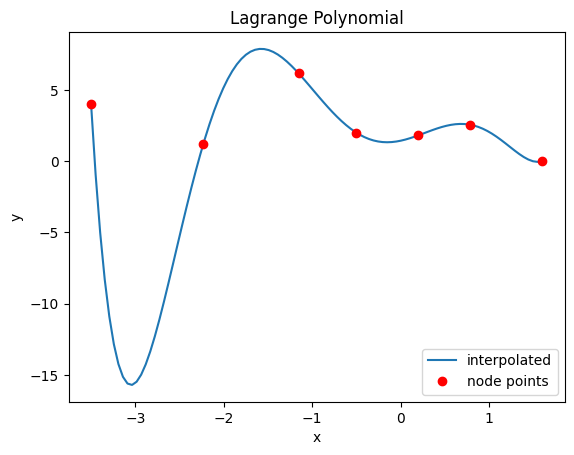

In [ ]:
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p = Lagrange_Polynomial(data_x, data_y)
print(p) # __repr__()

# generating 100 points from -3.5 to 1.6 in order to create a smooth line
x_arr = np.linspace(-3.5, 1.6, 100)
p_x_arr = p(x_arr) # __call__()

# plot to see if your implementation is correct
plt.plot(x_arr, p_x_arr)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')
plt.show()

# Daily Evaluation - 4 marks

[35.750000 35.134472 34.524252 33.919339 33.319734 32.725436 32.136446
 31.552764 30.974389 30.401322 29.833563 29.271111 28.713967 28.162130
 27.615601 27.074380 26.538466 26.007860 25.482562 24.962571 24.447888
 23.938512 23.434444 22.935684 22.442231 21.954086 21.471249 20.993719
 20.521497 20.054582 19.592975 19.136676 18.685684 18.240000 17.799624
 17.364555 16.934793 16.510340 16.091194 15.677355 15.268825 14.865601
 14.467686 14.075078 13.687778 13.305785 12.929100 12.557723 12.191653
 11.830891 11.475436 11.125289 10.780450 10.440918 10.106694 9.777778
 9.454169 9.135868 8.822874 8.515188 8.212810 7.915739 7.623976 7.337521
 7.056373 6.780533 6.510000 6.244775 5.984858 5.730248 5.480946 5.236951
 4.998264 4.764885 4.536814 4.314050 4.096593 3.884444 3.677603 3.476070
 3.279844 3.088926 2.903315 2.723012 2.548017 2.378329 2.213949 2.054876
 1.901111 1.752654 1.609504 1.471662 1.339128 1.211901 1.089982 0.973370
 0.862066 0.756070 0.655381 0.560000]


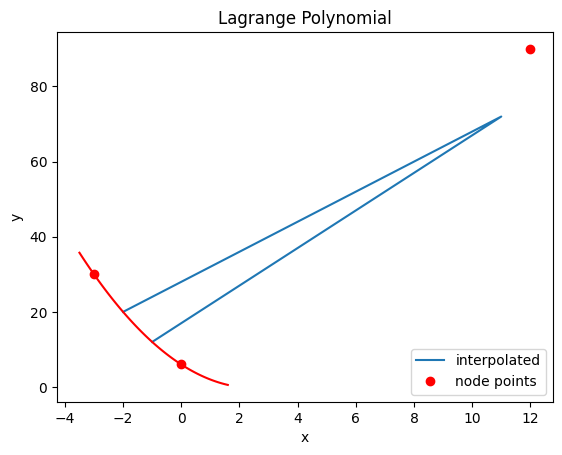

In [ ]:
x_arr=np.array([-2,11,-1])
y_arr=np.array([20,72,12])
fp=Lagrange_Polynomial(x_arr,y_arr)
x=np.array([0,12,-3])
y=fp(x)
x_ay = np.linspace(-3.5, 1.6, 100)
z=fp(x_ay)
print(z)
plt.plot(x_arr, y_arr)
plt.plot(x, y, 'ro')
plt.plot(x_ay, z, 'r-')
plt.legend(['Original data', 'Evaluated points', 'Interpolation'])
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')
plt.show()

In [ ]:
data_a=np.array([2,4,6])
data_b=np.array([8,16,24])
p_new=Lagrange_Polynomial(data_a,data_b)
print(p_new)
new_x=np.array([-1.5])
j=p_new(new_x)
print("Polynomial",j)
fx=4*new_x
error=abs(fx-j)
print(error)

LagrangePolynomial of order 2
p(x) = + 8*l_0(x) + 16*l_1(x) + 24*l_2(x) 
Polynomial [-6.000000]
[0.000000]
